# Sanity Check 

In [46]:
import os,sys
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option('display.max.columns',500)

sys.path.append('..\\..')

In [47]:
DATA_PATH_ENTRADA = "../../dados/1_dados_entrada"
DATA_PATH_TRATADOS = "../../dados/2_dados_tratados"
DATA_PATH_ENTRADA_CSVS = os.path.join(DATA_PATH_ENTRADA, 'CSVs')

In [48]:
lista_csvs = os.listdir(DATA_PATH_ENTRADA_CSVS)

In [49]:
lista_concat = []
for csv in lista_csvs:
    df = pd.read_csv(os.path.join(DATA_PATH_ENTRADA_CSVS, csv), sep=';', encoding='latin-1')
    lista_concat.append(df)

df = pd.concat(lista_concat)

In [50]:
df['EXERCÍCIO'].value_counts()

2014    28641
2015    27988
2020    27365
2016    27117
2019    26429
2017    26085
2018    25845
2021    24215
Name: EXERCÍCIO, dtype: int64

# 1 Importação e definição dos dados

A minha análise se absterá apenas as colunas após "NOME PROGRAMA ORÇAMENTÁRIO"

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 213685 entries, 0 to 24214
Data columns (total 25 columns):
 #   Column                        Non-Null Count   Dtype 
---  ------                        --------------   ----- 
 0   EXERCÍCIO                     213685 non-null  int64 
 1   CÓDIGO ÓRGÃO SUPERIOR         213685 non-null  int64 
 2   NOME ÓRGÃO SUPERIOR           213685 non-null  object
 3   CÓDIGO ÓRGÃO SUBORDINADO      213685 non-null  int64 
 4   NOME ÓRGÃO SUBORDINADO        213685 non-null  object
 5   CÓDIGO UNIDADE ORÇAMENTÁRIA   213685 non-null  int64 
 6   NOME UNIDADE ORÇAMENTÁRIA     213685 non-null  object
 7   CÓDIGO FUNÇÃO                 213685 non-null  int64 
 8   NOME FUNÇÃO                   213685 non-null  object
 9   CÓDIGO SUBFUNÇÃO              213685 non-null  int64 
 10  NOME SUBFUNÇÃO                213685 non-null  object
 11  CÓDIGO PROGRAMA ORÇAMENTÁRIO  213685 non-null  int64 
 12  NOME PROGRAMA ORÇAMENTÁRIO    213685 non-null  object
 13  

# 2 Reformulação dos dados

## 2.1 renomeando colunas

In [52]:
# Renomeando as colunas para facilitar o trabalho no código
df.columns = ['exercicios', 'cod_orgao_sup', 'nome_orgao_sup', 'cod_orgao_sub', 'nome_orgao_sub', 'cod_unid_orcament', 'nome_unid_orcament',
                   'cod_funcao', 'nome_funcao', 'cod_subfuncao', 'nome_subfuncao', 'cod_prog_orcament', 'nome_prog_orcament', 'cod_acao', 'nome_acao',
                   'cod_categ_econo', 'nome_categ_econo', 'cod_grp_despesa', 'nome_grp_despesa',  'cod_element_despesa', 'nome_element_despesa',
                   'orcamento_inicial', 'orcamento_atualizado', 'orcamento_empenhado', 'orcamento_realizado']

## 2.2 dropando valores desnecessários

Existem muitas colunasnas quais os valores presentes se referem ao código da função, setor, ministério, etc. Acredito que para fatores administrativos esses dados sejam válidos, porém não serão necessários nessa análise

In [53]:
df = df.drop(columns=df.columns[df.columns.str.contains(r'^cod_')])
df.columns

Index(['exercicios', 'nome_orgao_sup', 'nome_orgao_sub', 'nome_unid_orcament',
       'nome_funcao', 'nome_subfuncao', 'nome_prog_orcament', 'nome_acao',
       'nome_categ_econo', 'nome_grp_despesa', 'nome_element_despesa',
       'orcamento_inicial', 'orcamento_atualizado', 'orcamento_empenhado',
       'orcamento_realizado'],
      dtype='object')

## 2.3 Verificação da existência de valores faltantes

In [54]:
display(df.isnull().sum())

exercicios              0
nome_orgao_sup          0
nome_orgao_sub          0
nome_unid_orcament      0
nome_funcao             0
nome_subfuncao          0
nome_prog_orcament      0
nome_acao               0
nome_categ_econo        0
nome_grp_despesa        0
nome_element_despesa    0
orcamento_inicial       0
orcamento_atualizado    0
orcamento_empenhado     0
orcamento_realizado     0
dtype: int64

Como podemos ver não existe nenhum valor faltante. Em vista de que são dados do governo,percebemos os dados receberam um tratamento prévio, os valores que provavelmente seriam faltantes são substituidos por valores como "Não cadastrado", etc.

## 2.4 Casting de colunas

### 2.4.1 Verificação do formato das colunas

In [55]:
df.dtypes

exercicios               int64
nome_orgao_sup          object
nome_orgao_sub          object
nome_unid_orcament      object
nome_funcao             object
nome_subfuncao          object
nome_prog_orcament      object
nome_acao               object
nome_categ_econo        object
nome_grp_despesa        object
nome_element_despesa    object
orcamento_inicial       object
orcamento_atualizado    object
orcamento_empenhado     object
orcamento_realizado     object
dtype: object

In [56]:
display(df.head(3))

,exercicios,nome_orgao_sup,nome_orgao_sub,nome_unid_orcament,nome_funcao,nome_subfuncao,nome_prog_orcament,nome_acao,nome_categ_econo,nome_grp_despesa,nome_element_despesa,orcamento_inicial,orcamento_atualizado,orcamento_empenhado,orcamento_realizado
0,2014,Presidência da República,Secretaria de Políticas de Promoção da Igualda...,SEC.DE POLITICAS DE PROM.DA IGUALDADE RACIAL,Direitos da cidadania,Proteção e benefícios ao trabalhador,PROGRAMA DE GESTAO E MANUTENCAO DA SECRETARIA ...,"AUXILIO-ALIMENTACAO AOS SERVIDORES CIVIS, EMPR...",DESPESA CORRENTE,Outras Despesas Correntes,Despesas de Exercícios Anteriores,"2834,83","2834,83","0,00","0,00"
1,2014,Presidência da República,Secretaria de Políticas de Promoção da Igualda...,SEC.DE POLITICAS DE PROM.DA IGUALDADE RACIAL,Direitos da cidadania,Proteção e benefícios ao trabalhador,PROGRAMA DE GESTAO E MANUTENCAO DA SECRETARIA ...,"AUXILIO-ALIMENTACAO AOS SERVIDORES CIVIS, EMPR...",DESPESA CORRENTE,Outras Despesas Correntes,Auxílio-Alimentação,"223457,90","223457,90","0,00","0,00"
2,2014,Presidência da República,Secretaria de Políticas de Promoção da Igualda...,SEC.DE POLITICAS DE PROM.DA IGUALDADE RACIAL,Direitos da cidadania,Proteção e benefícios ao trabalhador,PROGRAMA DE GESTAO E MANUTENCAO DA SECRETARIA ...,"AUXILIO-ALIMENTACAO AOS SERVIDORES CIVIS, EMPR...",DESPESA CORRENTE,Outras Despesas Correntes,Não informado,"-11672,73","8327,27","0,00","0,00"


### 2.4.2 Tratamento dos formatos

Remoção da vírgula presente nos valores das colunas numéricas que se referem a valores em dinheiro

In [57]:
df['exercicios'] = pd.to_datetime(df['exercicios'], format='%Y')
df['orcamento_inicial'] = df['orcamento_inicial'].str.replace(',','.').astype(float)
df['orcamento_atualizado'] = df['orcamento_atualizado'].str.replace(',','.').astype(float)
df['orcamento_empenhado'] = df['orcamento_empenhado'].str.replace(',','.').astype(float)
df['orcamento_realizado'] = df['orcamento_realizado'].str.replace(',','.').astype(float)

Agora após a remoção da vírgula, e o casting dos valores para float, podemos vizualizar o resultado no dataset

In [58]:
df.dtypes

exercicios              datetime64[ns]
nome_orgao_sup                  object
nome_orgao_sub                  object
nome_unid_orcament              object
nome_funcao                     object
nome_subfuncao                  object
nome_prog_orcament              object
nome_acao                       object
nome_categ_econo                object
nome_grp_despesa                object
nome_element_despesa            object
orcamento_inicial              float64
orcamento_atualizado           float64
orcamento_empenhado            float64
orcamento_realizado            float64
dtype: object

## 2.5 Ordenando os dados

In [59]:
# Ordenando os dados pelo ano 
df = df.sort_values(by=['exercicios'],ascending=True)
display(df)

,exercicios,nome_orgao_sup,nome_orgao_sub,nome_unid_orcament,nome_funcao,nome_subfuncao,nome_prog_orcament,nome_acao,nome_categ_econo,nome_grp_despesa,nome_element_despesa,orcamento_inicial,orcamento_atualizado,orcamento_empenhado,orcamento_realizado
0,2014-01-01,Presidência da República,Secretaria de Políticas de Promoção da Igualda...,SEC.DE POLITICAS DE PROM.DA IGUALDADE RACIAL,Direitos da cidadania,Proteção e benefícios ao trabalhador,PROGRAMA DE GESTAO E MANUTENCAO DA SECRETARIA ...,"AUXILIO-ALIMENTACAO AOS SERVIDORES CIVIS, EMPR...",DESPESA CORRENTE,Outras Despesas Correntes,Despesas de Exercícios Anteriores,2.834830e+03,2.834830e+03,0.00,0.00
19100,2014-01-01,Ministério da Saúde,Ministério da Saúde - Unidades com vínculo direto,FUNDO NACIONAL DE SAUDE,Saúde,Normatização e fiscalização,APERFEICOAMENTO DO SISTEMA UNICO DE SAUDE (SUS),AUDITORIA DO SISTEMA UNICO DE SAUDE,DESPESA CORRENTE,Outras Despesas Correntes,Contribuições,1.500000e+06,1.500000e+06,1500000.00,1500000.00
19099,2014-01-01,Ministério da Saúde,Ministério da Saúde - Unidades com vínculo direto,FUNDO NACIONAL DE SAUDE,Saúde,Suporte profilático e terapêutico,APERFEICOAMENTO DO SISTEMA UNICO DE SAUDE (SUS),PARTICIPACAO DA UNIAO NO CAPITAL SOCIAL - EMPR...,DESPESA DE CAPITAL,Inversões Financeiras,Constituição ou Aumento de Capital de Empresas,1.000000e+08,1.000000e+08,30000000.00,0.00
19098,2014-01-01,Ministério da Saúde,Ministério da Saúde - Unidades com vínculo direto,FUNDO NACIONAL DE SAUDE,Saúde,"Direitos individuais, coletivos e difusos",APERFEICOAMENTO DO SISTEMA UNICO DE SAUDE (SUS),OUVIDORIA NACIONAL DE SAUDE,DESPESA CORRENTE,Outras Despesas Correntes,Diárias - Civil,7.230000e+04,7.230000e+04,48344.85,48344.85
19097,2014-01-01,Ministério da Saúde,Ministério da Saúde - Unidades com vínculo direto,FUNDO NACIONAL DE SAUDE,Saúde,"Direitos individuais, coletivos e difusos",APERFEICOAMENTO DO SISTEMA UNICO DE SAUDE (SUS),OUVIDORIA NACIONAL DE SAUDE,DESPESA CORRENTE,Outras Despesas Correntes,Material de Consumo,7.500000e+02,7.500000e+02,750.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8067,2021-01-01,Ministério da Educação,Universidade Federal do Sul e Sudeste do Pará,UNIV.FED.DO SUL E SUDESTE DO PARA - UNIFESSPA,Encargos especiais,Outros encargos especiais,OPERACOES ESPECIAIS: GESTAO DA PARTICIPACAO EM...,CONTRIBUICOES A ORGANISMOS INTERNACIONAIS SEM ...,DESPESAS CORRENTES,Outras Despesas Correntes,Não informado,-3.307600e+03,1.634000e+02,0.00,0.00
8066,2021-01-01,Ministério da Educação,Universidade Federal do Rio Grande,UNIVERSIDADE FEDERAL DO RIO GRANDE - FURG,Encargos especiais,Outros encargos especiais,OPERACOES ESPECIAIS: GESTAO DA PARTICIPACAO EM...,CONTRIBUICOES A ORGANISMOS INTERNACIONAIS SEM ...,DESPESAS CORRENTES,Outras Despesas Correntes,Não informado,-8.980500e+03,3.635000e+02,0.00,0.00
8065,2021-01-01,Ministério da Educação,Universidade Federal do Rio de Janeiro,UNIVERSIDADE FEDERAL DO RIO DE JANEIRO,Encargos especiais,Outros encargos especiais,OPERACOES ESPECIAIS: GESTAO DA PARTICIPACAO EM...,CONTRIBUICOES A ORGANISMOS INTERNACIONAIS SEM ...,DESPESAS CORRENTES,Outras Despesas Correntes,Contribuições,9.348048e+04,9.348048e+04,93480.48,33452.96
8074,2021-01-01,Ministério da Educação,Centro Federal de Educação Tecnológica Celso S...,CENTRO FED.DE EDUC.TECNOL.CELSO S.DA FONSECA,Encargos especiais,Outros encargos especiais,OPERACOES ESPECIAIS: GESTAO DA PARTICIPACAO EM...,CONTRIBUICOES A ORGANISMOS INTERNACIONAIS SEM ...,DESPESAS CORRENTES,Outras Despesas Correntes,Contribuições,2.145100e+04,2.145100e+04,21451.00,0.00


# 3 Entendimento dos dados

## 3.1 Colunas categóricas

In [60]:
categoricas = ['nome_acao','nome_categ_econo','nome_grp_despesa','nome_element_despesa']

In [61]:
df[categoricas[0]].value_counts().count()

3585

In [62]:
df[categoricas[0]].value_counts()

ADMINISTRACAO DA UNIDADE                                                                            16013
FUNCIONAMENTO DE INSTITUICOES FEDERAIS DE ENSINO SUPERIOR                                           10546
ATIVOS CIVIS DA UNIAO                                                                                8713
ASSISTENCIA MEDICA E ODONTOLOGICA AOS SERVIDORES CIVIS, EMPREGADOS, MILITARES E SEUS DEPENDENTES     7394
CAPACITACAO DE SERVIDORES PUBLICOS FEDERAIS EM PROCESSO DE QUALIFICACAO E REQUALIFICACAO             7012
                                                                                                    ...  
CONTRIBUICAO AO CENTRO REGIONAL DE SISMOLOGIA PARA A AMERICA DO SUL - CERESIS (MCTI)                    1
ADEQUACAO DE TRECHO RODOVIARIO - ERECHIM - PASSO FUNDO - NA BR-285/RS                                   1
ADEQUACOES SOB LINHA FERREA EM SAO CARLOS - NA EF-364/SP                                                1
ADEQUACAO DE LINHA FERREA EM NOVA ODESSA - NA 

<font color='red'> Como podemos verificar, não é possível validar manualmente os valores de 'nome_acao', no entanto não foi verificado nenhum valor anormal nos máximos nem mínimos valores

In [63]:
df[categoricas[1]].value_counts()

DESPESAS CORRENTES         151155
DESPESAS DE CAPITAL         33400
DESPESA CORRENTE            22730
DESPESA DE CAPITAL           5862
RESERVA DE CONTINGENCIA       537
Inválido                        1
Name: nome_categ_econo, dtype: int64

In [64]:
df[categoricas[2]].value_counts()

Outras Despesas Correntes                139890
Investimentos                             37705
Pessoal e Encargos Sociais                33705
Inversões Financeiras                      1339
Reserva de Contingência                     537
Juros e Encargos da Dívida                  290
Amortização/Refinanciamento da Dívida       218
Inválido                                      1
Name: nome_grp_despesa, dtype: int64

In [65]:
df[categoricas[3]].value_counts()

Não informado                                                       54422
Outros Serviços de Terceiros - Pessoa Jurídica                      20905
Despesas de Exercícios Anteriores                                   14147
Material de Consumo                                                  8747
Indenizações e Restituições                                          8692
                                                                    ...  
Aquisição de Títulos Representativos de Capital já Integralizado        4
A Classificar                                                           3
Arrendamento mercantil                                                  3
Remuneração de Cotas de Fundos Autárquicos                              3
Inválido                                                                1
Name: nome_element_despesa, Length: 77, dtype: int64

In [66]:
# Definir True apenas caso necessário verificar todos os valores manualmente
rodar = False
if rodar:
    for dados in df[categoricas[3]].value_counts().index:
        print(dados)

<font color='red'> Nas três colunas acima está presente um valor estranho :'Inválido'. Verifiquei manualmente as 77 colunas de 'nome_element_despesa', e existe apenas esse valor que é aparentemente errado

In [67]:
valor_invalido = df[(df[categoricas[3]] == 'Inválido')|(df[categoricas[2]] == 'Inválido')|(df[categoricas[1]] == 'Inválido')]
display(valor_invalido)

,exercicios,nome_orgao_sup,nome_orgao_sub,nome_unid_orcament,nome_funcao,nome_subfuncao,nome_prog_orcament,nome_acao,nome_categ_econo,nome_grp_despesa,nome_element_despesa,orcamento_inicial,orcamento_atualizado,orcamento_empenhado,orcamento_realizado
3846,2020-01-01,Ministério da Economia,Ministério da Economia - Unidades com vínculo ...,REC.SOB SUPERV. DO ME - DIVIDA PUB FED,Encargos especiais,Outros encargos especiais,OPERACOES ESPECIAIS: OUTROS ENCARGOS ESPECIAIS,ASSUNCAO E NOVACAO DE DIVIDAS DO FUNDO DE COMP...,Inválido,Inválido,Inválido,94000000.0,94000000.0,94000000.0,0.0


Ao verificar as colunas que tem esse valor presente, penso que é melhor não removê-lo 

In [68]:
display(valor_invalido.orcamento_inicial)
display(valor_invalido.orcamento_atualizado)
display(valor_invalido.orcamento_empenhado)
display(valor_invalido.orcamento_realizado)

3846    94000000.0
Name: orcamento_inicial, dtype: float64

3846    94000000.0
Name: orcamento_atualizado, dtype: float64

3846    94000000.0
Name: orcamento_empenhado, dtype: float64

3846    0.0
Name: orcamento_realizado, dtype: float64

Pois como vemos acima ele tinha um orçamento muito alto , 94 milhões de R$. Com isso, acredito que vale a pena estudar o motivo deste valor

## 3.2 Colunas numéricas

In [69]:
numericas = ['orcamento_inicial','orcamento_atualizado','orcamento_empenhado','orcamento_realizado']

Nos tópicos abaixo veremos a distribuição e evolução pelos anos dos valores

In [70]:
acumulado_orcamento_anos = df.groupby('exercicios').sum()

Verificando agora a existência de valores faltantes

In [71]:
df[numericas[0]].isnull().sum(), df[numericas[1]].isnull().sum(), df[numericas[2]].isnull().sum(), df[numericas[3]].isnull().sum()

(0, 0, 0, 0)

Como vemos, não existem valores faltantes nas colunas numéricas

### 3.2.1 Orçamento anos

<AxesSubplot:xlabel='orcamento_inicial'>

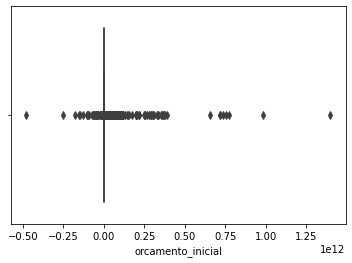

In [72]:
sns.boxplot(x=df['orcamento_inicial'])

In [73]:
import plotly.graph_objects as go


fig = go.Figure([go.Scatter(x=acumulado_orcamento_anos.index
                            , y=acumulado_orcamento_anos.orcamento_inicial,marker = {'color' : 'green'})])
fig.show()

### 3.2.2 Orçamento atualizado

<AxesSubplot:xlabel='orcamento_atualizado'>

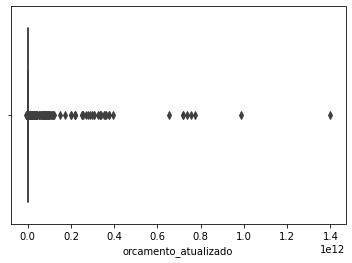

In [74]:
sns.boxplot(x=df['orcamento_atualizado'])

In [75]:
import plotly.graph_objects as go


fig = go.Figure([go.Scatter(x=acumulado_orcamento_anos.index
                            , y=acumulado_orcamento_anos.orcamento_atualizado,marker = {'color' : 'violet'})])
fig.show()

### 3.2.3 Orçamento empenhado

<AxesSubplot:xlabel='orcamento_empenhado'>

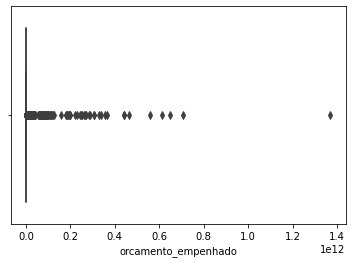

In [76]:
sns.boxplot(x=df['orcamento_empenhado'])

In [77]:
import plotly.graph_objects as go


fig = go.Figure([go.Scatter(x=acumulado_orcamento_anos.index
                            , y=acumulado_orcamento_anos.orcamento_empenhado,marker = {'color' : 'blue'})])
fig.show()

### 3.2.4 Orçamento realizado

<AxesSubplot:xlabel='orcamento_realizado'>

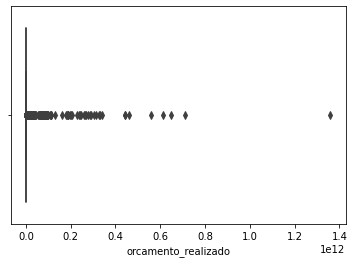

In [78]:
sns.boxplot(x=df['orcamento_realizado'])

In [79]:
import plotly.graph_objects as go


fig = go.Figure([go.Scatter(x=acumulado_orcamento_anos.index
                            , y=acumulado_orcamento_anos.orcamento_realizado,marker = {'color' : 'red'})])
fig.show()

Como vemos, observamos outliers, no entanto não podemos trata-los, pois são dados emitidos pelo governo que descrevem gastos. Acreditamos que os outliers nesse caso devem ser mantidos e não estão incorretos

In [80]:
df.to_pickle(os.path.join(DATA_PATH_TRATADOS, 'orcamento_tratado.pkl'))

### 4. Série histórica do PIB brasileiro

In [94]:
PIB = pd.read_excel(os.path.join(DATA_PATH_ENTRADA, 'PIB_1996_2021.xlsx'))
PIB.to_pickle(os.path.join(DATA_PATH_TRATADOS, 'PIB.pkl'))

### código experimental, ignorar

In [82]:
numericas = ['orcamento_inicial','orcamento_atualizado','orcamento_empenhado','orcamento_realizado']

In [83]:
lista_ministerios = df.nome_orgao_sup.value_counts().index.tolist()

In [84]:
lista_anos = []
for val in df.exercicios.value_counts().index.tolist():
    lista_anos.append(val.year)

In [85]:
lista_anos

[2014, 2015, 2020, 2016, 2019, 2017, 2018, 2021]

In [86]:
lista_ministerios_df = pd.DataFrame(columns=lista_ministerios,index=lista_anos)

In [87]:
orcamento_inicial = df.copy()

In [88]:
orcamento_inicial = orcamento_inicial.groupby(["nome_orgao_sup","exercicios"]).sum()
orcamento_inicial = orcamento_inicial.fillna(0)

In [89]:
lista_ministerios_df

,Ministério da Educação,Ministério da Economia,Ministério da Defesa,Ministério da Saúde,Ministério do Desenvolvimento Regional,Ministério da Infraestrutura,"Ministério da Ciência, Tecnologia, Inovações e Comunicações",Ministério da Justiça e Segurança Pública,Ministério de Minas e Energia,"Ministério da Agricultura, Pecuária e Abastecimento",Ministério do Turismo,Ministério do Meio Ambiente,Presidência da República,Ministério da Cidadania,"Ministério do Planejamento, Desenvolvimento e Gestão",Ministério das Comunicações,Ministério das Relações Exteriores,Ministério do Esporte,Ministério das Cidades,"Ministério da Mulher, Família e Direitos Humanos",Ministério da Cultura,"Ministério da Indústria, Comércio Exterior e Serviços",Ministério do Desenvolvimento Agrário,Controladoria-Geral da União,Advocacia-Geral da União,Ministério do Trabalho,"Ministério das Mulheres, Igualdade Racial, da Juventude e dos Direitos Humanos",Ministério do Trabalho e Emprego,Ministério da Pesca e Aquicultura,Ministério da Previdência Social
2014,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [90]:
lista_ministerios_df['Ministério da Educação'][2014]

nan

In [91]:

for col in lista_ministerios_df.columns:
    for year in lista_anos:
        lista_ministerios_df[col][year] = orcamento_inicial.loc[col].orcamento_realizado[f'{year}-01-01']
        #print(orcamento_inicial.loc[col].orcamento_realizado[f'{year}-01-01'])
        

KeyError: '2020-01-01'

In [ ]:
orcamento_inicial

In [ ]:
orcamento_inicial

In [ ]:
teste = df.copy().reset_index()
teste = df.melt(id_vars=['nome_orgao_sup', 'exercicios'])

In [ ]:
teste